In [1]:
# # Run this cell to mount your Google Drive.
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import tensorflow as tf

from sklearn.feature_selection import VarianceThreshold
# from keras.backend import manual_variable_initialization 
# # manual_variable_initialization(True)

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


In [3]:
data_p = pd.read_csv("points.csv",dtype=object,error_bad_lines=False) 
data_p.head()
data_p["id"] = data_p["id"].map(str) +"_"+ data_p["dir"]
data_p.head()
# data_p.dtypes

,s.no,id,dir,path,date,x1,y1,x2,y2,x3,...,x9996,y9996,x9997,y9997,x9998,y9998,x9999,y9999,x10000,y10000
0,1,ON_1_20181031_173504_104,104,C:\Hilink\BB4A\RESULT\BBM2\BBM2\NOMINAL\MANUAL...,31/10/2018,0.2,0.03,0.2,0.03,0.2,...,0.2,0.14,0.2,0.14,0.2,0.14,0.2,0.14,0.2,0.14
1,2,OFF_4_20181031_173921_104,104,C:\Hilink\BB4A\RESULT\BBM2\BBM2\NOMINAL\MANUAL...,31/10/2018,0.4,0.12,0.2,0.12,0.2,...,25.0,0.03,25.0,0.03,25.0,0.03,25.0,0.03,25.0,0.03
2,3,OFF_2_20181031_173628_104,104,C:\Hilink\BB4A\RESULT\BBM2\BBM2\NOMINAL\MANUAL...,31/10/2018,0.2,0.13,0.0,0.12,0.0,...,25.0,0.03,25.0,0.03,25.0,0.02,25.0,0.02,25.0,0.03
3,4,ON_3_20181031_173800_104,104,C:\Hilink\BB4A\RESULT\BBM2\BBM2\NOMINAL\MANUAL...,31/10/2018,0.2,0.03,0.4,0.02,0.4,...,0.2,0.14,0.0,0.14,0.2,0.14,0.2,0.14,0.2,0.14
4,5,OFF_4_20181102_085018_103,103,C:\Hilink\BB4A\RESULT\BBM2\BBM2\NOMINAL\MANUAL...,02/11/2018,0.2,0.15,0.2,0.16,0.2,...,25.0,0.05,25.0,0.06,25.0,0.05,25.2,0.05,25.0,0.05


In [4]:

data_v = pd.read_csv("values.csv",dtype=object,error_bad_lines=False )
le = preprocessing.LabelEncoder()

data_v['power_state_spec'] = le.fit_transform(data_v['power_state_spec'].astype('str'))

data_v['power_state_value'] = le.fit_transform(data_v['power_state_value'].astype('str'))
data_v["id"] = data_v["id"].map(str) +"_"+data_v["dir"]
data_v.head()

,s.no,id,dir,_file_,power_state_value,current_rise/fall_time_value (mS),current_stabilised_value (mA),current_max/min_value (mA),power_state_spec,current_rise/fall_time_spec (mS),current_stabilised_spec (mA),current_max/min_spec (mA),power_state_N/NC,current_rise/fall_time_C/NC,current_stabilised_C/NC,current_max/min_C/NC
0,1,ON_1_20181031_173504_104,104,HEGSE_72.HTM,1,89.990000000000,150.000000000000,405.992200000000,1,60,510.204,800,C,NC,C,C
1,2,OFF_2_20181031_173628_104,104,HEGSE_72.HTM,0,7.992000000000,30.000000000000,-56.000000000000,0,10,510.204,-100,C,C,C,C
2,3,ON_3_20181031_173800_104,104,HEGSE_72.HTM,1,89.950000000000,140.000000000000,405.992200000000,1,60,495.049,800,C,NC,C,C
3,4,OFF_4_20181031_173921_104,104,HEGSE_72.HTM,0,7.997000000000,30.000000000000,-58.000000000000,0,10,495.049,-100,C,C,C,C
4,5,ON_1_20181102_084600_103,103,HEGSE_72.HTM,1,56.650000000000,169.800000000000,405.992200000000,1,60,510.204,800,C,C,C,C


In [5]:
arr_v = data_v.values
arr_p = data_p.values

In [6]:
arr_v = arr_v[0:]
# print(arr_v)
arr_p = arr_p[0:]
# print(arr_p)

In [7]:
ON_list =[]
OFF_list = []
for i in range(len(arr_p)):
    s = arr_p[i][1]
    s = str(s)
    
#     print(type(st))
    if s.find("N") == -1:
        OFF_list.append(arr_p[i])
    
    else:
        ON_list.append(arr_p[i])
# calculating for ON
print(len(ON_list),"ON")
print(len(OFF_list),"OFF")
arr_on_p = np.array(OFF_list)
# print(arr_on_p)

426 ON
398 OFF


In [8]:
arr_on_p = np.delete(arr_on_p, 3,  axis=1)
arr_on_p_n = arr_on_p[:, 1::2]
arr_on_p_f = np.delete(arr_on_p_n, 1,  axis=1)
# print(len(arr_on_p_f))
# print(len(arr_on_p_f[0]))
# print(arr_on_p_f[0])

In [9]:
data = arr_on_p_f

df=pd.DataFrame(data=data[0:,0:],index=[i for i in range(data.shape[0])],
                columns=['y'+str(i) for i in range(data.shape[1])])
df.head()
# df.dtypes


,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y9991,y9992,y9993,y9994,y9995,y9996,y9997,y9998,y9999,y10000
0,OFF_4_20181031_173921_104,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03
1,OFF_2_20181031_173628_104,0.13,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.03
2,OFF_4_20181102_085018_103,0.15,0.16,0.15,0.15,0.15,0.15,0.15,0.15,0.14,...,0.06,0.06,0.06,0.06,0.06,0.05,0.06,0.05,0.05,0.05
3,OFF_2_20181102_084723_103,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.05,0.05,0.05
4,OFF_4_20181102_090312_102,0.15,0.14,0.14,0.15,0.15,0.15,0.14,0.14,0.14,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06


In [10]:
print(df.shape)
# for j in range(10000):
#   var = "y"+str(j+1)
#   df[var].fillna(df[var].mean(), inplace=True)
df_no_miss = df.dropna()
print(df_no_miss.shape)
print(df.shape)
df_no_miss.head()


(398, 10001)
(397, 10001)
(398, 10001)


,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y9991,y9992,y9993,y9994,y9995,y9996,y9997,y9998,y9999,y10000
0,OFF_4_20181031_173921_104,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03
1,OFF_2_20181031_173628_104,0.13,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.03
2,OFF_4_20181102_085018_103,0.15,0.16,0.15,0.15,0.15,0.15,0.15,0.15,0.14,...,0.06,0.06,0.06,0.06,0.06,0.05,0.06,0.05,0.05,0.05
3,OFF_2_20181102_084723_103,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.05,0.05,0.05
4,OFF_4_20181102_090312_102,0.15,0.14,0.14,0.15,0.15,0.15,0.14,0.14,0.14,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06


In [11]:
arr_p_no = df_no_miss.values
print(len(arr_p_no))

397


In [12]:
df1= df_no_miss.rename(index=str, columns={"y0": "id"})
df1.head()

,id,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y9991,y9992,y9993,y9994,y9995,y9996,y9997,y9998,y9999,y10000
0,OFF_4_20181031_173921_104,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03
1,OFF_2_20181031_173628_104,0.13,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.03
2,OFF_4_20181102_085018_103,0.15,0.16,0.15,0.15,0.15,0.15,0.15,0.15,0.14,...,0.06,0.06,0.06,0.06,0.06,0.05,0.06,0.05,0.05,0.05
3,OFF_2_20181102_084723_103,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.05,0.05,0.05
4,OFF_4_20181102_090312_102,0.15,0.14,0.14,0.15,0.15,0.15,0.14,0.14,0.14,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06


In [13]:
print(df1.shape)
df2 = data_v
# print(df2.shape)
combine = (pd.merge(df1, df2, how='left', on='id'))
# print(df1.unique)
print(combine.shape)

(397, 10001)
(397, 10016)


In [14]:
combine.head()

,id,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,current_stabilised_value (mA),current_max/min_value (mA),power_state_spec,current_rise/fall_time_spec (mS),current_stabilised_spec (mA),current_max/min_spec (mA),power_state_N/NC,current_rise/fall_time_C/NC,current_stabilised_C/NC,current_max/min_C/NC
0,OFF_4_20181031_173921_104,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,...,30.000000000000,-58.000000000000,0.0,10,495.049,-100,C,C,C,C
1,OFF_2_20181031_173628_104,0.13,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,...,30.000000000000,-56.000000000000,0.0,10,510.204,-100,C,C,C,C
2,OFF_4_20181102_085018_103,0.15,0.16,0.15,0.15,0.15,0.15,0.15,0.15,0.14,...,58.000000000000,-28.000000000000,0.0,10,495.049,-100,C,C,C,C
3,OFF_2_20181102_084723_103,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,56.400000000000,-32.000000000000,0.0,10,510.204,-100,C,C,C,C
4,OFF_4_20181102_090312_102,0.15,0.14,0.14,0.15,0.15,0.15,0.14,0.14,0.14,...,57.900000000000,-23.804700000000,0.0,10,495.049,-100,C,C,C,C


In [15]:
combine.iloc[:,0:10010].head()
k = combine.drop(['s.no','dir','_file_'], axis = 1) 

k.head()

,id,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,current_stabilised_value (mA),current_max/min_value (mA),power_state_spec,current_rise/fall_time_spec (mS),current_stabilised_spec (mA),current_max/min_spec (mA),power_state_N/NC,current_rise/fall_time_C/NC,current_stabilised_C/NC,current_max/min_C/NC
0,OFF_4_20181031_173921_104,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,...,30.000000000000,-58.000000000000,0.0,10,495.049,-100,C,C,C,C
1,OFF_2_20181031_173628_104,0.13,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,...,30.000000000000,-56.000000000000,0.0,10,510.204,-100,C,C,C,C
2,OFF_4_20181102_085018_103,0.15,0.16,0.15,0.15,0.15,0.15,0.15,0.15,0.14,...,58.000000000000,-28.000000000000,0.0,10,495.049,-100,C,C,C,C
3,OFF_2_20181102_084723_103,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,56.400000000000,-32.000000000000,0.0,10,510.204,-100,C,C,C,C
4,OFF_4_20181102_090312_102,0.15,0.14,0.14,0.15,0.15,0.15,0.14,0.14,0.14,...,57.900000000000,-23.804700000000,0.0,10,495.049,-100,C,C,C,C


In [16]:
input_1 = k.iloc[:,0:10009]
# filling the missing values

# print(input_1.iloc[:,10008])
miss = input_1.iloc[:,1:]
miss.head()

,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y9999,y10000,power_state_value,current_rise/fall_time_value (mS),current_stabilised_value (mA),current_max/min_value (mA),power_state_spec,current_rise/fall_time_spec (mS),current_stabilised_spec (mA),current_max/min_spec (mA)
0,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,...,0.03,0.03,0.0,7.997000000000,30.000000000000,-58.000000000000,0.0,10,495.049,-100
1,0.13,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.13,...,0.02,0.03,0.0,7.992000000000,30.000000000000,-56.000000000000,0.0,10,510.204,-100
2,0.15,0.16,0.15,0.15,0.15,0.15,0.15,0.15,0.14,0.15,...,0.05,0.05,0.0,8.000000000000,58.000000000000,-28.000000000000,0.0,10,495.049,-100
3,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.05,0.05,0.0,8.000000000000,56.400000000000,-32.000000000000,0.0,10,510.204,-100
4,0.15,0.14,0.14,0.15,0.15,0.15,0.14,0.14,0.14,0.15,...,0.06,0.06,0.0,8.000000000000,57.900000000000,-23.804700000000,0.0,10,495.049,-100


In [17]:
input_1 = k.iloc[:,0:10009]
# filling the missing values

miss = input_1.iloc[:,1:]
miss.head()



  
for column in (miss.iloc[:,10000:]):
  su = 0
  div = 0
  for r in range(miss.shape[0]):
    if (pd.isna(miss[column][r]))== False:
      su = float(miss[column][r])+su

      div = div+1

  fin = float(su/div)

  miss[column].fillna(float(fin),inplace=True)
#########converting ever
# thing into float
miss =miss.astype('float64')
# print(miss.dtypes)
miss.head()


,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y9999,y10000,power_state_value,current_rise/fall_time_value (mS),current_stabilised_value (mA),current_max/min_value (mA),power_state_spec,current_rise/fall_time_spec (mS),current_stabilised_spec (mA),current_max/min_spec (mA)
0,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,...,0.03,0.03,0.0,7.997,30.0,-58.0000,0.0,10.0,495.049,-100.0
1,0.13,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.13,...,0.02,0.03,0.0,7.992,30.0,-56.0000,0.0,10.0,510.204,-100.0
2,0.15,0.16,0.15,0.15,0.15,0.15,0.15,0.15,0.14,0.15,...,0.05,0.05,0.0,8.000,58.0,-28.0000,0.0,10.0,495.049,-100.0
3,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.05,0.05,0.0,8.000,56.4,-32.0000,0.0,10.0,510.204,-100.0
4,0.15,0.14,0.14,0.15,0.15,0.15,0.14,0.14,0.14,0.15,...,0.06,0.06,0.0,8.000,57.9,-23.8047,0.0,10.0,495.049,-100.0


In [18]:
import pandas as pd
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import robust_scale

scaler_min_x = MinMaxScaler()
scaler_min_y = MinMaxScaler()

scaler_norm_x = Normalizer()
scaler_norm_y = Normalizer()

scaler_stan_x = StandardScaler()
scaler_stan_y = StandardScaler()

scalar_qt_x =QuantileTransformer(output_distribution='uniform')
scalar_qt_y =QuantileTransformer(output_distribution='uniform')
       

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [19]:
rand_na = miss
# print(miss.shape)
input_1_arr = rand_na.values
input_1_arr[:,:]= input_1_arr[:,:].astype('float64')

X = input_1_arr[:,0:10000]*1000
Y = input_1_arr[:,10002:10004]
# print(X.shape)
# print(Y.shape)
# print(Y)
y=np.reshape(Y, (-1,1))

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
X_train= X
y_train= Y


# ######minmax
scaler_min_x = MinMaxScaler().fit(X_train)
scaler_min_y = MinMaxScaler().fit(y_train)

X_minmax_train = scaler_min_x.transform(X_train)
Y_minmax_train = scaler_min_y.transform(y_train)


# print(X)
# print(Y)
#####standard

scaler_stan_x = StandardScaler().fit(X_train)
scaler_stan_y = StandardScaler().fit(y_train)


X_stan_train = scaler_stan_x.transform(X_train)
Y_stan_train = scaler_stan_y.transform(y_train)

#######normlised
scaler_norm_x = Normalizer().fit(X_train)
scaler_norm_y = Normalizer().fit(y_train)


X_norm_train = scaler_norm_x.transform(X_train)
Y_norm_train = scaler_norm_y.transform(y_train)


# ################qt

scaler_qt_x =  QuantileTransformer(output_distribution='normal').fit(X_train)
scaler_qt_y =  QuantileTransformer(output_distribution='normal').fit(y_train)


X_qt_train = scaler_qt_x.transform(X_train)
Y_qt_train = scaler_qt_y.transform(y_train)


##robust

##robust
print(np.amax(X_train[0,:]))
print(np.amax(y_train[0,:]))

X_train = np.concatenate((X_train, y_train), axis=1)
# print(np.amax(X_train[0,:]))
X_train_t = X_train.transpose()
# y_train_t = y_train.transpose()
# print(X_train,"after")
# print(y_train.shape,"after")

scaler_rob_x = MinMaxScaler().fit(X_train_t)
# scaler_rob_y = RobustScaler().fit(y_train_t)


X_rob_train = scaler_rob_x.transform(X_train_t)
# Y_rob_train = scaler_rob_x.transform(y_train_t)

X_rob_train = X_rob_train.transpose()
# Y_rob_train = Y_rob_train.transpose()

print(X_rob_train.shape)
# print(Y_rob_train.shape)
# print(Y_rob_train)

Y_rob_train = X_rob_train[:,10000:10002]
X_rob_train = X_rob_train[:,0:10000]
# print(Y_rob_train)
# print(X_rob_train)

130.0
30.0
(397, 10002)


In [20]:
from sklearn.decomposition import FactorAnalysis

transformer = FactorAnalysis(n_components=30, random_state=0)
factor_fit = transformer.fit(X_rob_train)
X_new = factor_fit.transform(X_rob_train)
X_new.shape

(397, 30)

In [21]:

import pickle
pickle.dump(factor_fit, open( "./app/MODEL/factor_fit_off.pkl", "wb" ) )



In [22]:
def baseline_model_30(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(28, activation='relu', 
                    kernel_initializer = 'he_normal', 
                    input_shape=(30,)))
    model.add(BatchNormalization())
#     model.add(Dropout(0.5))
#     model.add(Dense(30, activation='relu',
#                     kernel_initializer = 'he_normal'))
#       model.add(BatchNormalization())
#     model.add(Dropout(0.5))
    model.add(Dense(12, activation='relu',
                    kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())
#     model.add(Dropout(0.5))
    model.add(Dense(9, activation='relu',
                    kernel_initializer = 'he_normal'))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.5))
    model.add(Dense(2, activation='linear', 
                    kernel_initializer='he_normal'))
    model.compile(loss = 'mse', optimizer=optimizer, metrics=['mae'])
#     model.summary()
    return model


In [23]:
model = baseline_model_30()

print (model.get_weights())
# estimator = train_data_nn(X_new, Y_rob_train)

print(X_new.shape)
print(y_train.shape)
history = model.fit(X_new,  Y_rob_train, epochs=200, batch_size=5,  verbose=1, validation_split=0.0)

[array([[-2.59035528e-01, -6.65560514e-02, -3.29185545e-01,
         1.56924218e-01, -2.27046996e-01, -2.32120350e-01,
         4.21938933e-02,  1.17573105e-01, -1.87833562e-01,
        -2.90572435e-01,  1.14753172e-01, -2.66756564e-01,
         5.64354718e-01,  4.99108166e-01,  8.82269517e-02,
         1.14135496e-01, -8.28252640e-03,  1.84313655e-01,
         2.42587641e-01, -1.25212938e-01,  1.06012672e-01,
         2.85745502e-01,  3.75647247e-01,  5.18496811e-01,
         2.04486713e-01, -1.78865984e-01, -5.51907301e-01,
        -1.23069495e-01],
       [ 1.73620164e-01, -3.39415073e-01, -2.26551488e-01,
        -3.62448126e-01,  3.40087533e-01,  1.48896858e-01,
         1.04154237e-01,  2.44390577e-01, -1.45732790e-01,
         2.22676713e-02, -3.97206470e-02, -5.20596862e-01,
         4.96477157e-01,  1.08337253e-01,  1.50147527e-01,
        -2.37482935e-01,  2.03128651e-01, -3.19087923e-01,
         2.49445140e-02,  8.11580047e-02, -2.70541102e-01,
        -1.32500947e-01,  2.9

Epoch 1/200
397/397 [==============================] - 1s 1ms/step - loss: 1.9388 - mean_absolute_error: 1.0813
Epoch 2/200
397/397 [==============================] - 0s 325us/step - loss: 0.7672 - mean_absolute_error: 0.6611
Epoch 3/200
397/397 [==============================] - 0s 334us/step - loss: 0.4900 - mean_absolute_error: 0.5190
Epoch 4/200
397/397 [==============================] - 0s 339us/step - loss: 0.3374 - mean_absolute_error: 0.4406
Epoch 5/200
397/397 [==============================] - 0s 344us/step - loss: 0.2933 - mean_absolute_error: 0.4008
Epoch 6/200
397/397 [==============================] - 0s 325us/step - loss: 0.2350 - mean_absolute_error: 0.3559
Epoch 7/200
397/397 [==============================] - 0s 312us/step - loss: 0.1746 - mean_absolute_error: 0.3150
Epoch 8/200
397/397 [==============================] - 0s 314us/step - loss: 0.1701 - mean_absolute_error: 0.3057
Epoch 9/200
397/397 [==============================] - 0s 318us/step - loss: 0.1332 - mean

397/397 [==============================] - 0s 331us/step - loss: 0.0330 - mean_absolute_error: 0.1220
Epoch 73/200
397/397 [==============================] - 0s 427us/step - loss: 0.0321 - mean_absolute_error: 0.1206
Epoch 74/200
397/397 [==============================] - 0s 304us/step - loss: 0.0319 - mean_absolute_error: 0.1209
Epoch 75/200
397/397 [==============================] - 0s 299us/step - loss: 0.0303 - mean_absolute_error: 0.1167
Epoch 76/200
397/397 [==============================] - 0s 291us/step - loss: 0.0297 - mean_absolute_error: 0.1169
Epoch 77/200
397/397 [==============================] - 0s 287us/step - loss: 0.0299 - mean_absolute_error: 0.1148
Epoch 78/200
397/397 [==============================] - 0s 291us/step - loss: 0.0300 - mean_absolute_error: 0.1192
Epoch 79/200
397/397 [==============================] - 0s 296us/step - loss: 0.0306 - mean_absolute_error: 0.1156
Epoch 80/200
397/397 [==============================] - 0s 298us/step - loss: 0.0301 - mean_a

Epoch 143/200
397/397 [==============================] - 0s 598us/step - loss: 0.0264 - mean_absolute_error: 0.1036
Epoch 144/200
397/397 [==============================] - 0s 306us/step - loss: 0.0269 - mean_absolute_error: 0.1044
Epoch 145/200
397/397 [==============================] - 0s 332us/step - loss: 0.0263 - mean_absolute_error: 0.1040
Epoch 146/200
397/397 [==============================] - 0s 342us/step - loss: 0.0238 - mean_absolute_error: 0.0993
Epoch 147/200
397/397 [==============================] - 0s 348us/step - loss: 0.0258 - mean_absolute_error: 0.1020
Epoch 148/200
397/397 [==============================] - 0s 301us/step - loss: 0.0247 - mean_absolute_error: 0.0991
Epoch 149/200
397/397 [==============================] - 0s 329us/step - loss: 0.0259 - mean_absolute_error: 0.1023
Epoch 150/200
397/397 [==============================] - 0s 302us/step - loss: 0.0233 - mean_absolute_error: 0.0971
Epoch 151/200
397/397 [==============================] - 0s 325us/step -

In [24]:
def visualize_learning_curve(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['loss'])
#     plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['mean_absolute_error'])
#     plt.plot(history.history['val_mean_absolute_error'])
    plt.title('model mean_absolute_error')
    plt.ylabel('mean_absolute_error')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [25]:

# print(X_test.shape)
# X_test_t = X_test.transpose()
# print(X_test_t.shape)
# scaler_rob_x = MinMaxScaler().fit(X_test_t)
# X_new_test_t = scaler_rob_x.transform(X_test_t)
# X_new_test = X_new_test_t.transpose()
# print(X_new_test.shape)

# y_test_t = y_test.transpose()
# # scaler_rob_y = RobustScaler().fit(y_test_t)
# Y_new_test_t = scaler_rob_x.transform(y_test_t)
# Y_new_test = Y_new_test_t.transpose()

# X_new_test = factor_fit.transform(X_new_test)
# print(X_new_test.shape)

# visualize_learning_curve(history)

0.023443124783176044
dict_keys(['loss', 'mean_absolute_error'])


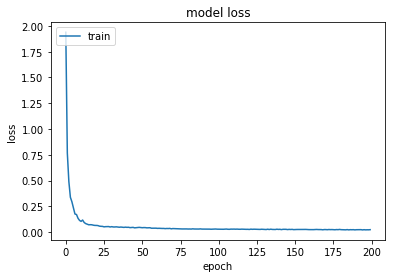

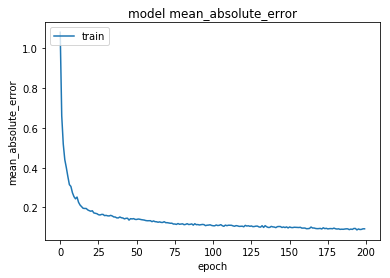

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math
# from sklearn.metrics import max_error

pred = model.predict((X_new))
# print(pred)

mse = (mean_squared_error(Y_rob_train,pred))

print(mse)
visualize_learning_curve(history)

In [27]:

X1 = input_1_arr[:,0:10000]*1000
Y1 = input_1_arr[:,10000:10004]

X=X1
Y=Y1[:,2:4]
# print(Y)
Y_new = np.zeros((Y.shape[0],2))
for i in range(len(Y)):
  
    print(Y[i],"y")
  

    X_t= X[i].transpose()

    scaler_rob_x = MinMaxScaler().fit((X_t.reshape(-1, 1)))
                        
    Xi = (scaler_rob_x.transform(X_t.reshape(-1, 1)))

    I = factor_fit.transform(Xi.transpose())

    pred = model.predict(I)

  
    Y_ti =Y[i].transpose()

#     scaler_rob_y = RobustScaler().fit(Y_ti.reshape(-1, 1))
    final_t = scaler_rob_x.inverse_transform(pred.reshape(-1, 1))
                                          

    final = final_t.transpose()
                                          
    print(final[0])

    h = abs(final-Y[i])
#   print(h,"h")
#     o=np.divide(h,Y[i])
#   print(o*100,"percentage") 
  
    Y_new[i]=final[0]


[ 30. -58.] y
[-12.507226 -51.962925]
[ 30. -56.] y
[-10.365916 -53.107758]
[ 58. -28.] y
[ 44.53699  -28.018963]
[ 56.4 -32. ] y
[ 39.731964 -27.23471 ]
[ 57.9    -23.8047] y
[ 43.240513 -17.664326]
[ 55.1    -26.4219] y
[ 35.27972 -26.39494]
[ 0.02      -0.0688594] y
[  0.54564536 -64.3893    ]
[ 0.03      -0.0549297] y
[ 12.3392725 -47.51723  ]
[  0.     -39.3672] y
[ -2.7627158 -34.909336 ]
[  0.     -39.2578] y
[ -0.28023005 -34.56996   ]
[ -5.     -39.9766] y
[ -2.7627158 -34.909336 ]
[  0.     -36.9063] y
[ -0.28023005 -34.56996   ]
[ -5.     -40.9297] y
[ -0.28023005 -34.56996   ]
[-10.     -41.7813] y
[ -2.7627158 -34.909336 ]
[  0.     -27.8281] y
[ 12.272313 -15.588092]
[  0.     -30.0469] y
[ 12.272313 -15.588092]
[ 0.     12.2813] y
[49.78983 24.07253]
[0.     7.0469] y
[39.789825 14.072531]
[ 54.7    -24.8047] y
[ 54.303604 -18.495625]
[ 59.9    -23.0938] y
[ 46.536995 -18.202356]
[ 57.8    -24.9219] y
[ 56.555305 -23.9579  ]
[ 60.     -23.2578] y
[ 49.568977 -13.280247]


[  0.     -37.5391] y
[ -0.28023005 -34.56996   ]
[  0.     -31.1641] y
[-57.727688 -85.5881  ]
[  0.     -32.8828] y
[-57.727688 -85.5881  ]
[ 0.     15.1094] y
[52.272312 24.41191 ]
[ 0.     14.7422] y
[52.272312 24.41191 ]
[  0.     -25.0859] y
[-60.21017 -85.92747]
[  0.     -26.8906] y
[-57.727688 -85.5881  ]
[-30.     -62.3438] y
[-22.762716 -54.90934 ]
[-30.     -62.5391] y
[-22.762716 -54.90934 ]
[-20.     -56.3672] y
[-20.28023 -54.56996]
[-20.     -57.8906] y
[-20.28023 -54.56996]
[-25.     -61.8125] y
[-22.762716 -54.90934 ]
[-30.     -63.2891] y
[-22.762716 -54.90934 ]
[-83.45878378 -38.91072023] y
[ 15.619512 -22.1095  ]
[-83.45878378 -38.91072023] y
[ 20.667435 -18.714489]
[-83.45878378 -38.91072023] y
[ 11.811011 -21.513725]
[-83.45878378 -38.91072023] y
[ 33.52346  -20.945482]
[-83.45878378 -38.91072023] y
[ 30.127834 -26.411736]
[-83.45878378 -38.91072023] y
[ 19.63309  -23.085663]
[ 40.     -36.0313] y
[ 35.710976 -29.110786]
[ 40.     -36.3984] y
[ 26.603281 -32.5244

In [28]:
X1 = X1
Y1 = Y1
# print(Y1)

# print(Y)
from sklearn.metrics import r2_score
print(Y1[0,2], Y_new[0,0])
# print(Y_new[:,0])
g = r2_score(Y1[:,2], Y_new[:,0])  
g1 = r2_score(Y1[:,3], Y_new[:,1]) 
print(g,g1)
Y1[:,2]= Y_new[:,0]
Y1[:,3]= Y_new[:,1]
print(Y1[0,2], Y_new[0,0])


30.0 -12.50722599029541
0.9938962613142325 -18.166165660725078
-12.50722599029541 -12.50722599029541


In [29]:

X1_new = np.concatenate((X1,Y1[:,2:4]),axis=1)
print(X1_new.shape)
Y1_new = Y1[:,0:2]
# print(Y1_new)
# X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X1_new, Y1_new, test_size=0.20)
X_train_c= X1_new
y_train_c = Y1_new

(397, 10002)


In [30]:
#standardise


# ######minmax
scaler_min_x = MinMaxScaler().fit(X_train_c)
scaler_min_y = MinMaxScaler().fit(y_train_c)

X_minmax_train = scaler_min_x.transform(X_train_c)
Y_minmax_train = scaler_min_y.transform(y_train_c)


# print(X)
# print(Y)
#####standard

scaler_stan_x = StandardScaler().fit(X_train_c)
scaler_stan_y = StandardScaler().fit(y_train_c)


X_stan_train = scaler_stan_x.transform(X_train_c)
Y_stan_train = scaler_stan_y.transform(y_train_c)

# #######normlised
# scaler_norm_x = Normalizer().fit(X_train_c)
# scaler_norm_y = Normalizer().fit(y_train_c)


# X_norm_train = scaler_norm_x.transform(X_train_c)
# Y_norm_train = scaler_norm_y.transform(y_train_c)


# # ################qt

# scaler_qt_x =  QuantileTransformer(output_distribution='normal').fit(X_train_c)
# scaler_qt_y =  QuantileTransformer(output_distribution='normal').fit(y_train_c)


# X_qt_train = scaler_qt_x.transform(X_train_c)
# Y_qt_train = scaler_qt_y.transform(y_train_c)


##robust
# print(X_train.shape)
# print(y_train.shape)
# X_train_t = X_train.transpose()
# y_train_t = y_train.transpose()
# print(X_train.shape,"after")
# print(y_train.shape,"after")
scaler_rob_x = MinMaxScaler().fit(X_train_c)
scaler_rob_y = MinMaxScaler().fit(y_train_c)


# X_rob_train = scaler_rob_x.transform(X_train_c)
# Y_rob_train = scaler_rob_y.transform(y_train_c)

In [31]:
import pickle
pickle.dump(scaler_rob_x, open( "./app/MODEL/scaler_rob_x_1_OFF.pkl", "wb" ) )
pickle.dump(scaler_rob_y, open( "./app/MODEL/scaler_rob_y_1_OFF.pkl", "wb" ) )
X_rob_train_c = scaler_rob_x.transform(X_train_c)
Y_rob_train_c = scaler_rob_y.transform(y_train_c)



In [32]:
#apply PCA on X1_new
transformer = FactorAnalysis(n_components=30, random_state=0)
factor_fit = transformer.fit(X_rob_train_c[:,0:10000])
X_new1 = factor_fit.transform(X_rob_train_c[:,0:10000])
print(X_new1.shape)
X_new1 = np.concatenate((X_new1,X_rob_train_c[:,10000:10002]),axis=1)
print(X_new1.shape)
# print((X_rob_train[:,0:10000].shape))

(397, 30)
(397, 32)


In [33]:
import pickle
pickle.dump(factor_fit, open( "./app/MODEL/factor_fit_1_OFF.pkl", "wb" ) )


In [34]:
def baseline_model_31(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(30, activation='relu', 
                    kernel_initializer = 'he_normal', 
                    input_shape=(32,)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
#     model.add(Dense(30, activation='relu',
#                     kernel_initializer = 'he_normal'))
#       model.add(BatchNormalization())
#     model.add(Dropout(0.5))
    model.add(Dense(12, activation='relu',
                    kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())
#     model.add(Dropout(0.5))
    model.add(Dense(9, activation='relu',
                    kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())
#     model.add(Dropout(0.5))
    model.add(Dense(2, activation='linear', 
                    kernel_initializer='he_normal'))
    model.compile(loss = 'mse', optimizer=optimizer, metrics=['mae'])
#     model.summary()
    return model



In [35]:
model1 = baseline_model_31()

# estimator1 = train_data_nn_1(X_new1, Y_rob_train)

# print(X_new.shape)
# print(y_train.shape)
history = model1.fit(X_new1,  Y_rob_train_c, epochs=400, batch_size=5,  verbose=1, validation_split=0.0)

Epoch 1/400
397/397 [==============================] - 1s 3ms/step - loss: 1.7476 - mean_absolute_error: 1.0634
Epoch 2/400
397/397 [==============================] - 0s 429us/step - loss: 1.0790 - mean_absolute_error: 0.8198
Epoch 3/400
397/397 [==============================] - 0s 439us/step - loss: 0.7651 - mean_absolute_error: 0.6806
Epoch 4/400
397/397 [==============================] - 0s 439us/step - loss: 0.5731 - mean_absolute_error: 0.5956
Epoch 5/400
397/397 [==============================] - 0s 429us/step - loss: 0.4599 - mean_absolute_error: 0.5299
Epoch 6/400
397/397 [==============================] - 0s 387us/step - loss: 0.3333 - mean_absolute_error: 0.4609
Epoch 7/400
397/397 [==============================] - 0s 420us/step - loss: 0.2959 - mean_absolute_error: 0.4282
Epoch 8/400
397/397 [==============================] - 0s 417us/step - loss: 0.2518 - mean_absolute_error: 0.3984
Epoch 9/400
397/397 [==============================] - 0s 430us/step - loss: 0.2168 - mean

397/397 [==============================] - 0s 391us/step - loss: 0.0452 - mean_absolute_error: 0.1390
Epoch 73/400
397/397 [==============================] - 0s 453us/step - loss: 0.0439 - mean_absolute_error: 0.1375
Epoch 74/400
397/397 [==============================] - 0s 412us/step - loss: 0.0466 - mean_absolute_error: 0.1414
Epoch 75/400
397/397 [==============================] - 0s 388us/step - loss: 0.0447 - mean_absolute_error: 0.1400
Epoch 76/400
397/397 [==============================] - 0s 390us/step - loss: 0.0442 - mean_absolute_error: 0.1397
Epoch 77/400
397/397 [==============================] - 0s 383us/step - loss: 0.0448 - mean_absolute_error: 0.1389
Epoch 78/400
397/397 [==============================] - 0s 396us/step - loss: 0.0432 - mean_absolute_error: 0.1341
Epoch 79/400
397/397 [==============================] - 0s 386us/step - loss: 0.0425 - mean_absolute_error: 0.1345
Epoch 80/400
397/397 [==============================] - 0s 371us/step - loss: 0.0452 - mean_a

Epoch 143/400
397/397 [==============================] - 0s 375us/step - loss: 0.0370 - mean_absolute_error: 0.1108
Epoch 144/400
397/397 [==============================] - 0s 361us/step - loss: 0.0341 - mean_absolute_error: 0.1063
Epoch 145/400
397/397 [==============================] - 0s 370us/step - loss: 0.0375 - mean_absolute_error: 0.1100
Epoch 146/400
397/397 [==============================] - 0s 363us/step - loss: 0.0384 - mean_absolute_error: 0.1144
Epoch 147/400
397/397 [==============================] - 0s 381us/step - loss: 0.0372 - mean_absolute_error: 0.1102
Epoch 148/400
397/397 [==============================] - 0s 368us/step - loss: 0.0376 - mean_absolute_error: 0.1102
Epoch 149/400
397/397 [==============================] - 0s 366us/step - loss: 0.0376 - mean_absolute_error: 0.1134
Epoch 150/400
397/397 [==============================] - 0s 383us/step - loss: 0.0395 - mean_absolute_error: 0.1154
Epoch 151/400
397/397 [==============================] - 0s 378us/step -

397/397 [==============================] - 0s 391us/step - loss: 0.0357 - mean_absolute_error: 0.1072
Epoch 214/400
397/397 [==============================] - 0s 369us/step - loss: 0.0355 - mean_absolute_error: 0.1085
Epoch 215/400
397/397 [==============================] - 0s 391us/step - loss: 0.0363 - mean_absolute_error: 0.1084
Epoch 216/400
397/397 [==============================] - 0s 381us/step - loss: 0.0347 - mean_absolute_error: 0.1080
Epoch 217/400
397/397 [==============================] - 0s 392us/step - loss: 0.0355 - mean_absolute_error: 0.1066
Epoch 218/400
397/397 [==============================] - 0s 382us/step - loss: 0.0374 - mean_absolute_error: 0.1105
Epoch 219/400
397/397 [==============================] - 0s 382us/step - loss: 0.0347 - mean_absolute_error: 0.1056
Epoch 220/400
397/397 [==============================] - 0s 378us/step - loss: 0.0364 - mean_absolute_error: 0.1080
Epoch 221/400
397/397 [==============================] - 0s 381us/step - loss: 0.0370 

397/397 [==============================] - 0s 415us/step - loss: 0.0331 - mean_absolute_error: 0.1002
Epoch 284/400
397/397 [==============================] - 0s 395us/step - loss: 0.0326 - mean_absolute_error: 0.1022
Epoch 285/400
397/397 [==============================] - 0s 390us/step - loss: 0.0332 - mean_absolute_error: 0.1016
Epoch 286/400
397/397 [==============================] - 0s 402us/step - loss: 0.0338 - mean_absolute_error: 0.1039
Epoch 287/400
397/397 [==============================] - 0s 400us/step - loss: 0.0334 - mean_absolute_error: 0.1001
Epoch 288/400
397/397 [==============================] - 0s 404us/step - loss: 0.0334 - mean_absolute_error: 0.1061
Epoch 289/400
397/397 [==============================] - 0s 413us/step - loss: 0.0340 - mean_absolute_error: 0.1064
Epoch 290/400
397/397 [==============================] - 0s 403us/step - loss: 0.0316 - mean_absolute_error: 0.0993
Epoch 291/400
397/397 [==============================] - 0s 369us/step - loss: 0.0335 

397/397 [==============================] - 0s 413us/step - loss: 0.0333 - mean_absolute_error: 0.1008
Epoch 354/400
397/397 [==============================] - 0s 372us/step - loss: 0.0304 - mean_absolute_error: 0.0964
Epoch 355/400
397/397 [==============================] - 0s 386us/step - loss: 0.0341 - mean_absolute_error: 0.1029
Epoch 356/400
397/397 [==============================] - 0s 362us/step - loss: 0.0314 - mean_absolute_error: 0.0953
Epoch 357/400
397/397 [==============================] - 0s 358us/step - loss: 0.0324 - mean_absolute_error: 0.0998
Epoch 358/400
397/397 [==============================] - 0s 375us/step - loss: 0.0312 - mean_absolute_error: 0.0972
Epoch 359/400
397/397 [==============================] - 0s 371us/step - loss: 0.0296 - mean_absolute_error: 0.0916
Epoch 360/400
397/397 [==============================] - 0s 398us/step - loss: 0.0333 - mean_absolute_error: 0.1007
Epoch 361/400
397/397 [==============================] - 0s 407us/step - loss: 0.0326 

(397, 2)
0.193529743825924
dict_keys(['loss', 'mean_absolute_error'])


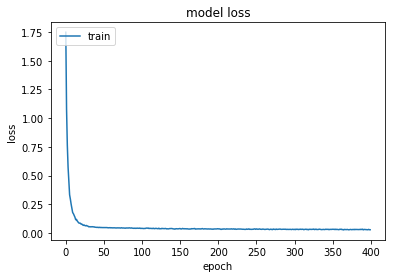

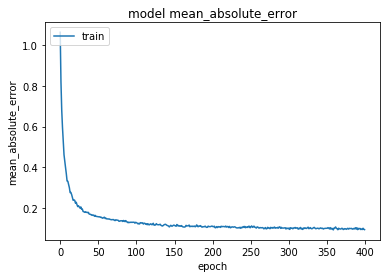

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math
# from sklearn.metrics import max_error

pred_c = model1.predict((X_new1))
print(pred_c.shape)

mse = (mean_squared_error(Y_rob_train,pred_c))

print(mse)
visualize_learning_curve(history)


In [37]:
for i in range(len(y_train_c)):
  
    print(y_train_c[i],"ytest[i]")
#     print(X_train_c[i])
    
    X_c = (scaler_rob_x.transform(X_train_c[i].reshape(1, -1)))

#     print(X_c)
    I = factor_fit.transform(X_c[:,0:10000])
    I = np.concatenate((I,X_c[:,10000:10002]),axis=1)
#   print(I.shape,"I shape")

    pred_c = model1.predict(I)
#     print(pred_c,"pred_c.shape")
  
 

  
    final = scaler_rob_y.inverse_transform(pred_c.reshape(1, -1))
#     print(final,"final")                               
    final[0][0]= np.abs(np.round(final[0][0]))
                                          
    print(final[0],"final")

    h = abs(final[0]-y_train_c[i])

[0.    7.997] ytest[i]
[0.        4.0268126] final
[0.    7.992] ytest[i]
[0.        3.8874526] final
[0. 8.] ytest[i]
[0.       6.724819] final
[0. 8.] ytest[i]
[0.        6.5644484] final
[0. 8.] ytest[i]
[0.        5.1307397] final
[0.    4.377] ytest[i]
[0.        5.5208893] final
[0.       0.007997] ytest[i]
[0.       2.977557] final
[0.       0.007704] ytest[i]
[0.        4.5070105] final
[0.    1.088] ytest[i]
[0.        2.4503384] final
[0.    1.088] ytest[i]
[0.        2.4298677] final
[0.    1.259] ytest[i]
[0.        2.8628573] final
[0.   1.26] ytest[i]
[0.        2.5376463] final
[0.    0.987] ytest[i]
[0.        3.1634815] final
[0.    7.734] ytest[i]
[0.        3.3150678] final
[0.    1.333] ytest[i]
[0.        2.5407734] final
[0.    1.335] ytest[i]
[0.        2.4931042] final
[0.    1.189] ytest[i]
[0.        2.0634766] final
[0.    1.317] ytest[i]
[0.        2.2024753] final
[0.    4.627] ytest[i]
[0.       5.192132] final
[0.    7.901] ytest[i]
[0.        5.5262985] 

[0.        2.5770814] final
[0.    1.314] ytest[i]
[0.       2.389595] final
[0.   1.15] ytest[i]
[0.        1.9994061] final
[0.   1.32] ytest[i]
[0.        2.1692967] final
[0.         3.17820033] ytest[i]
[0.       2.441764] final
[0.   1.49] ytest[i]
[0.       3.243709] final
[0.    7.968] ytest[i]
[0.        3.3004048] final
[0.    1.271] ytest[i]
[0.       2.622202] final
[0.         3.17820033] ytest[i]
[0.        1.8877845] final
[0.         3.17820033] ytest[i]
[0.        2.7747161] final
[0.    7.991] ytest[i]
[0.        3.2797694] final
[0.    1.084] ytest[i]
[0.        2.8605206] final
[0. 8.] ytest[i]
[0.        3.0853398] final
[0.    7.999] ytest[i]
[0.       2.602967] final
[0.    7.947] ytest[i]
[0.        2.4566174] final
[0.    7.873] ytest[i]
[0.        2.4738393] final
[0.    7.985] ytest[i]
[0.        2.6970003] final
[0.    7.985] ytest[i]
[0.        2.5841978] final
[0.    6.701] ytest[i]
[0.        2.4619668] final
[0.     1.1032] ytest[i]
[0.        2.8120503]

[0.        2.5654972] final
[0.    1.002] ytest[i]
[0.        2.9798498] final
[0.    1.441] ytest[i]
[0.        2.7573898] final
[0.    7.583] ytest[i]
[0.        3.3519547] final
[0.    0.955] ytest[i]
[0.        1.0936749] final
[0.    0.962] ytest[i]
[0.        1.1227655] final
[0.    7.969] ytest[i]
[0.        4.9900284] final
[0.    7.976] ytest[i]
[0.        3.3653436] final
[0.   1.26] ytest[i]
[0.        2.6901972] final
[0.   1.13] ytest[i]
[0.        3.2734828] final
[0.    1.269] ytest[i]
[0.        2.7117412] final
[0.    1.123] ytest[i]
[0.        3.0882638] final
[0.    1.415] ytest[i]
[0.       2.939336] final
[0.    1.418] ytest[i]
[0.       2.952553] final
[ 0.    -1.906] ytest[i]
[0.         0.15855059] final
[0.    1.026] ytest[i]
[0.         0.28524873] final
[ 0.    -1.906] ytest[i]
[0.       2.441764] final
[ 0.    -1.906] ytest[i]
[0.       2.441764] final
[0.    4.654] ytest[i]
[0.       4.466612] final
[0.    7.999] ytest[i]
[0.      4.98975] final
[0.    4.46

In [43]:

from keras.backend import manual_variable_initialization 
manual_variable_initialization(True)
model.save ("./app/MODEL/my_model_OFF.h5")
model1.save ("./app/MODEL/my_model_1_OFF.h5")





# print(model.get_weights())

print (model1.get_weights())
model1.save_weights("on_1.h5")

[array([[-5.76976745e-04,  2.88612008e-01, -1.57551169e-01,
         2.66819179e-01,  1.21495955e-01, -3.26907098e-01,
         8.98686349e-02,  4.99746889e-01, -5.10475934e-01,
        -1.06109597e-03,  9.16330144e-02,  1.52086392e-01,
        -9.50342342e-02,  7.13111507e-03,  1.37739470e-02,
         4.80768919e-01,  2.69788831e-01,  2.02877387e-01,
         1.14756130e-01,  5.53117335e-01, -1.97793767e-01,
        -3.07405051e-02, -2.35204577e-01,  3.26211870e-01,
        -2.00515836e-01, -1.15660056e-01, -8.20448995e-03,
        -1.15520194e-01,  1.72188580e-01, -3.89198102e-02],
       [ 1.75629720e-01,  6.37308806e-02,  4.89225090e-01,
        -3.09708357e-01,  2.98361257e-02, -6.87822402e-01,
        -6.34265542e-01,  6.34112507e-02,  7.35174179e-01,
         8.59218061e-01, -2.75187850e-01,  1.84194967e-01,
        -1.54222503e-01,  2.68522263e-01,  5.13904810e-01,
         1.93150237e-01, -1.14932291e-01, -4.98337984e-01,
        -1.35968313e-01, -8.97699744e-02, -9.23948139e

In [39]:
# from keras.models import load_model
# new_model = load_model('my_model_ON.h5')
# new_model_1 = load_model('my_model_1_ON.h5')

In [40]:
# pred = new_model_1.predict((X_new1))
# print(pred.shape)

# mse = (mean_squared_error(Y_rob_train,pred))

# print(mse)